In [64]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from onix.analysis.fitter import Fitter

In [91]:
def sin_squared(p,p_sat, A):
    return A * np.sin((np.pi / 2) * np.sqrt(p / p_sat))**4

In [88]:
amplitudes = 100. * np.array([0, 2, 3, 3.5, 4, 5, 4.5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16 ,17, 18, 19, 20, 21, 22, 23, 24])
volts_input = [i / 32768 * 2.5 for i in amplitudes]
watts_input = [i**2 / 100 for i in volts_input]
dbm_input = [10* np.log10(1000 * i) for i in watts_input]
dbm_output = [33.78 + i for i in dbm_input]
watts_output = [10**(i / 10) * 1e-3 for i in dbm_output]
powers_uW = 1 * np.array([0, 4, 20, 31, 54, 130, 80, 260, 460, 760, 1150, 1650, 2260, 3000, 3800, 4700, 5650, 6700, 7700, 8700, 9500, 10400, 11100, 11800, 12200, 12500])

/tmp/ipykernel_1080893/1752148131.py:4: RuntimeWarning: divide by zero encountered in log10
  dbm_input = [10* np.log10(1000 * i) for i in watts_input]


In [92]:
fitter = Fitter(sin_squared)
fitter.set_data(watts_output, powers_uW)
fitter.fit()

/tmp/ipykernel_1080893/1932188118.py:2: RuntimeWarning: invalid value encountered in sqrt
  return A * np.sin((np.pi / 2) * np.sqrt(p / p_sat))**4


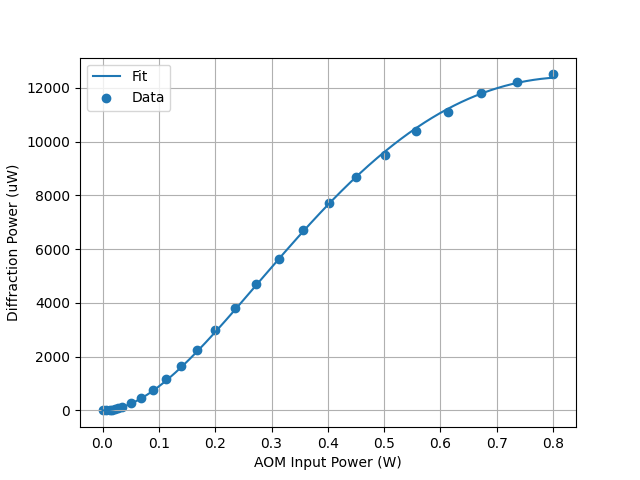

In [97]:
fig, ax = plt.subplots()
xaxis = np.linspace(min(watts_output), max(watts_output), 1000)
ax.plot(xaxis, fitter.fitted_value(xaxis), label = "Fit")
# ax.plot(xaxis, sin_squared(xaxis, 2, 1), label = "2W")
ax.scatter(watts_output, powers_uW, label = "Data")
ax.set_xlabel("AOM Input Power (W)")
ax.set_ylabel("Diffraction Power (uW)")
ax.grid()
ax.legend()

In [94]:
fitter.all_results_str()

'p_sat = 0.832(4) \nA = 12400(40) \nReduced $\\chi^2$ is undefined.'